In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime as dt

## Изучение данных

In [2]:
df = pd.read_csv(r'C:/Users/Shatalina-yur/data/data_test.csv', sep=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147813 entries, 0 to 147812
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      147813 non-null  object 
 1   user_id   147813 non-null  int64  
 2   event     147813 non-null  object 
 3   hotel_id  147813 non-null  int64  
 4   sum_usd   9392 non-null    float64
 5   n_days    9392 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.8+ MB


Дана таблица на 147 813 строк, 5 столбцов. Много нулевых значений в столбцах sum_usd и n_days. Заполним пропуски нулями.

In [3]:
df.head()

,time,user_id,event,hotel_id,sum_usd,n_days
0,04:34:58,288941,open_hotel,37183566,NaN,NaN
1,04:34:58,288941,open_hotel,37183566,NaN,NaN
2,04:35:29,288941,open_hotel,37183566,NaN,NaN
3,04:35:30,288941,open_hotel,37183566,NaN,NaN
4,14:05:53,234057,open_hotel,21723277,NaN,NaN


In [4]:
df.isna().sum()

time             0
user_id          0
event            0
hotel_id         0
sum_usd     138421
n_days      138421
dtype: int64

In [5]:
df = df.fillna(0)

df.head()

,time,user_id,event,hotel_id,sum_usd,n_days
0,04:34:58,288941,open_hotel,37183566,0.0,0.0
1,04:34:58,288941,open_hotel,37183566,0.0,0.0
2,04:35:29,288941,open_hotel,37183566,0.0,0.0
3,04:35:30,288941,open_hotel,37183566,0.0,0.0
4,14:05:53,234057,open_hotel,21723277,0.0,0.0


In [6]:
df.isna().sum()

time        0
user_id     0
event       0
hotel_id    0
sum_usd     0
n_days      0
dtype: int64

Проверим на дубликаты

In [7]:
df.duplicated().sum()

np.int64(11156)

Удалим дубликаты

In [8]:
data = df.drop_duplicates()

data.head()

,time,user_id,event,hotel_id,sum_usd,n_days
0,04:34:58,288941,open_hotel,37183566,0.0,0.0
2,04:35:29,288941,open_hotel,37183566,0.0,0.0
3,04:35:30,288941,open_hotel,37183566,0.0,0.0
4,14:05:53,234057,open_hotel,21723277,0.0,0.0
5,14:08:22,234057,open_hotel,22716969,0.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136657 entries, 0 to 147812
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      136657 non-null  object 
 1   user_id   136657 non-null  int64  
 2   event     136657 non-null  object 
 3   hotel_id  136657 non-null  int64  
 4   sum_usd   136657 non-null  float64
 5   n_days    136657 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.3+ MB


In [10]:
data.loc[data['event'] == 'open_compare'].head(10)

,time,user_id,event,hotel_id,sum_usd,n_days
35,15:52:47,293626,open_compare,78606874,0.0,0.0
48,14:08:52,932866,open_compare,44544755,0.0,0.0
76,16:57:23,377323,open_compare,65459607,0.0,0.0
173,05:56:17,807015,open_compare,17634456,0.0,0.0
183,12:07:43,551742,open_compare,56585299,0.0,0.0
263,17:58:33,964016,open_compare,94231903,0.0,0.0
294,15:34:18,900718,open_compare,93036207,0.0,0.0
352,06:12:30,524757,open_compare,34806741,0.0,0.0
368,10:39:19,271703,open_compare,78571353,0.0,0.0
403,12:33:58,446570,open_compare,52747859,0.0,0.0


In [11]:
data['event'].value_counts()

event
open_hotel      123673
book              9392
open_compare      3592
Name: count, dtype: int64

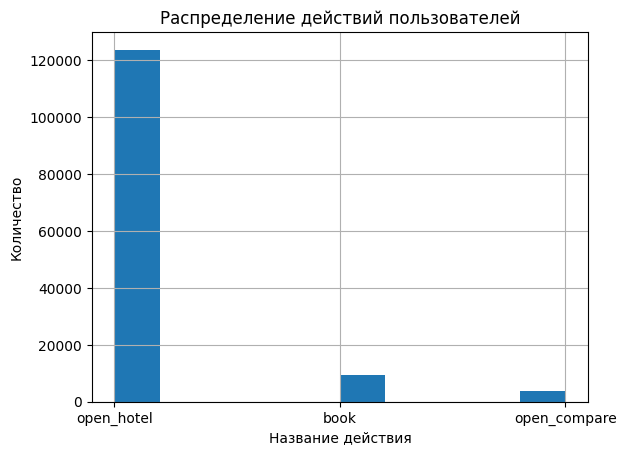

In [12]:
data['event'].hist()
plt.xlabel("Название действия")
plt.ylabel("Количество")
plt.title('Распределение действий пользователей')
plt.show()

Большинство пользователей просто просматривают сайт, ничего не бронируя.

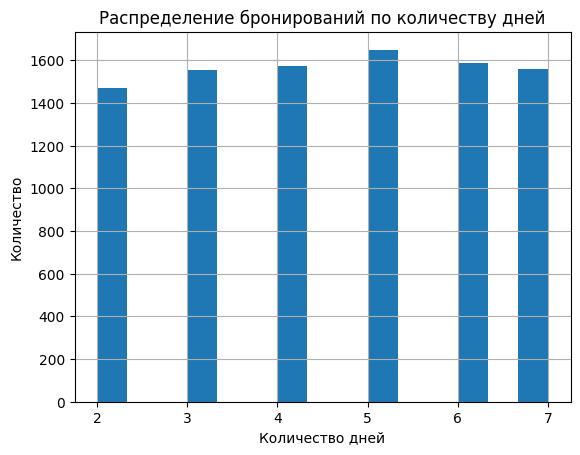

In [13]:
data.loc[data['n_days']>0]['n_days'].hist(bins=15)
plt.xlabel("Количество дней")
plt.ylabel("Количество")
plt.title('Распределение бронирований по количеству дней')
plt.show()

Переведем значения времени в часы.

In [14]:
data['hour'] = pd.to_datetime(data['time']).dt.hour

C:\Users\Shatalina-yur\AppData\Local\Temp\ipykernel_12628\508269847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour'] = pd.to_datetime(data['time']).dt.hour
C:\Users\Shatalina-yur\AppData\Local\Temp\ipykernel_12628\508269847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = pd.to_datetime(data['time']).dt.hour


In [15]:
data.head()

,time,user_id,event,hotel_id,sum_usd,n_days,hour
0,04:34:58,288941,open_hotel,37183566,0.0,0.0,4
2,04:35:29,288941,open_hotel,37183566,0.0,0.0,4
3,04:35:30,288941,open_hotel,37183566,0.0,0.0,4
4,14:05:53,234057,open_hotel,21723277,0.0,0.0,14
5,14:08:22,234057,open_hotel,22716969,0.0,0.0,14


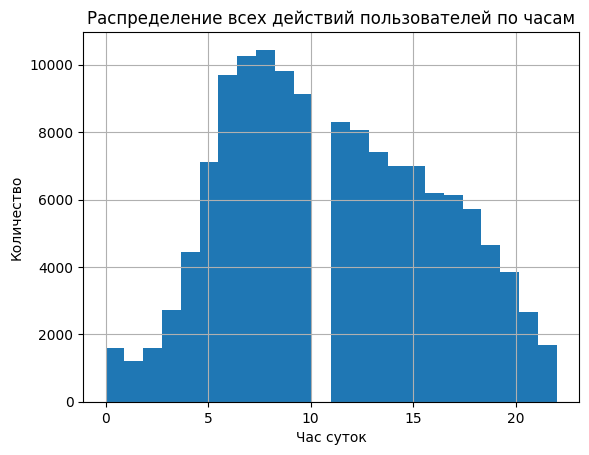

In [16]:
data['hour'].hist(bins=24)
plt.xlabel("Час суток")
plt.ylabel("Количество")
plt.title('Распределение всех действий пользователей по часам')
plt.show()

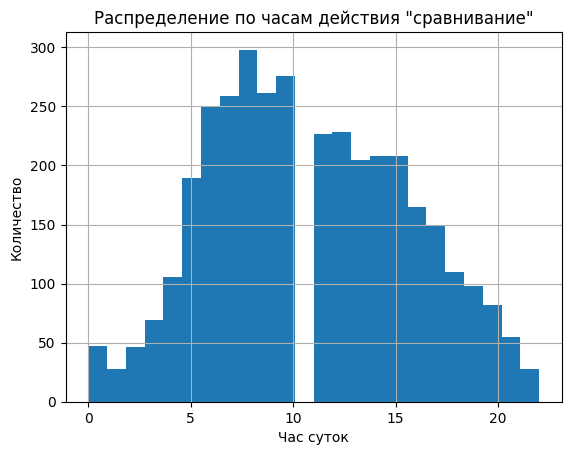

In [17]:
data.loc[data['event']=='open_compare']['hour'].hist(bins=24)
plt.xlabel("Час суток")
plt.ylabel("Количество")
plt.title('Распределение по часам действия "сравнивание"')
plt.show()

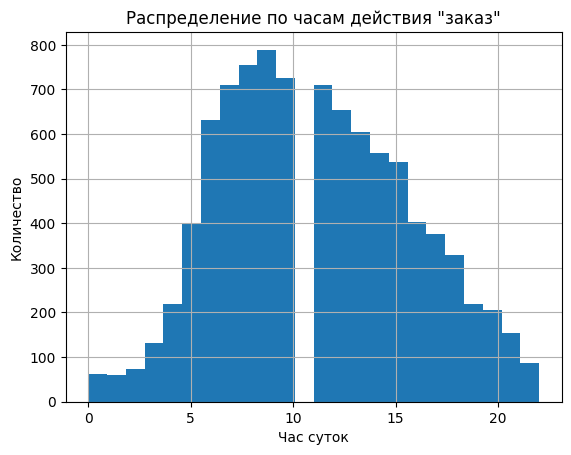

In [18]:
data.loc[data['event']=='book']['hour'].hist(bins=24)
plt.xlabel("Час суток")
plt.ylabel("Количество")
plt.title('Распределение по часам действия "заказ"')
plt.show()

Нет противоречий действий пользователей по часам. Распределение одинаково по часам и для просмотров, и для сравнений отелей, и для бронирования.
Пик приходится на утренние часы с 6 до 10 утра. Данных за 11 часов дня нет.

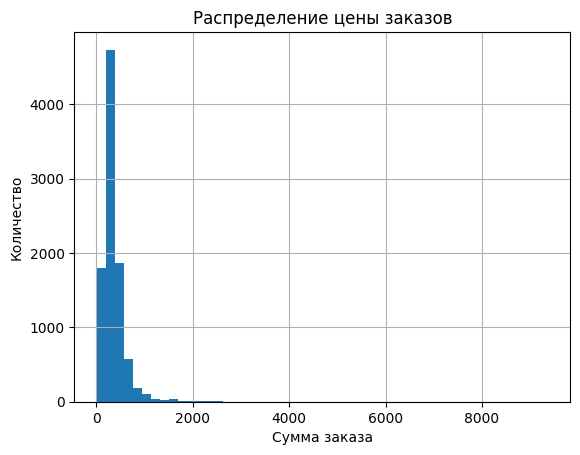

In [19]:
data.loc[data['sum_usd']>0]['sum_usd'].hist(bins=50)
plt.xlabel("Cумма заказа")
plt.ylabel("Количество")
plt.title('Распределение цены заказов')
plt.show()

Построим ящик с усами для более точного выявления средней  цены заказа.

(0.0, 1000.0)

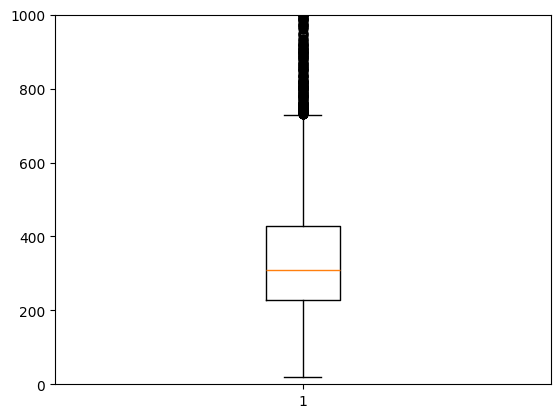

In [20]:
plt.boxplot(x=data.loc[data['sum_usd']>0]['sum_usd'])
plt.ylim([0,1000])

Сродняя цена заказа 300 uds. Большинство заказов в пределах 220 - 450 usd.

In [21]:
data[data['sum_usd']>0].describe()

,user_id,hotel_id,sum_usd,n_days,hour
count,9392.000000,9.392000e+03,9392.000000,9392.000000,9392.000000
mean,550346.035030,5.524171e+07,368.768952,4.532368,11.089757
std,257289.901586,2.589431e+07,282.979469,1.689071,4.658516
min,100037.000000,1.000741e+07,19.000000,2.000000,0.000000
25%,327829.500000,3.314875e+07,227.000000,3.000000,8.000000
50%,551846.000000,5.482905e+07,310.000000,5.000000,11.000000
75%,770329.000000,7.754894e+07,428.000000,6.000000,14.000000
max,999879.000000,9.997988e+07,9364.000000,7.000000,22.000000


Рассмотрим отели по их популярности запросов.

In [22]:
data['hotel_id'].value_counts()

hotel_id
35105529    159
40278835    115
99633920    112
96263679    107
15191138     98
           ... 
77689617      1
57546839      1
39154944      1
84899995      1
49446106      1
Name: count, Length: 68789, dtype: int64

In [23]:
hotels = data['hotel_id'].unique()
len(hotels)

68789

Всего рассмотрено за период 68 789 отелей, из них ТОП-5 по запросам имеют id:
1. 35105529    
2. 40278835    
3. 99633920    
4. 96263679    
5. 15191138    

Рассмотрим ТОП-5 заказываемых отелей.

In [24]:
data[data['sum_usd']>0]['hotel_id'].value_counts()

hotel_id
40278835    17
99633920    16
35105529    14
16377861    14
24250310    14
            ..
70308122     1
38368565     1
72279080     1
31468597     1
97820734     1
Name: count, Length: 8146, dtype: int64

In [25]:
hotels_book = data[data['sum_usd']>0]['hotel_id'].unique()
len(hotels_book)

8146

Всего было забронированы номера в 8146 отелях. ТОП-5 самых популярных по бронированиям:
1. 40278835
2. 99633920    
3. 35105529    
4. 16377861    
5. 24250310    

In [26]:
data.head()

,time,user_id,event,hotel_id,sum_usd,n_days,hour
0,04:34:58,288941,open_hotel,37183566,0.0,0.0,4
2,04:35:29,288941,open_hotel,37183566,0.0,0.0,4
3,04:35:30,288941,open_hotel,37183566,0.0,0.0,4
4,14:05:53,234057,open_hotel,21723277,0.0,0.0,14
5,14:08:22,234057,open_hotel,22716969,0.0,0.0,14


Удалим столбец time

In [27]:
ds = data.drop(['time'], axis=1)

Переведем статус действий пользователей в числовые параметры.

In [28]:
ds['event_open_hotel'] =0
ds['event_book'] =0
ds['event_open_compare'] =0

In [29]:
ds.loc[ds['event'] == 'book', 'event_book'] = 1

In [30]:
ds.loc[ds['event'] == 'open_compare', 'event_open_compare'] = 1

In [31]:
ds.loc[ds['event'] == 'open_hotel', 'event_open_hotel'] = 1

Удалим стобец 'event', построим матрицу корреляции

In [32]:
ds = ds.drop(['event'], axis=1)

In [33]:
ds.head()

,user_id,hotel_id,sum_usd,n_days,hour,event_open_hotel,event_book,event_open_compare
0,288941,37183566,0.0,0.0,4,1,0,0
2,288941,37183566,0.0,0.0,4,1,0,0
3,288941,37183566,0.0,0.0,4,1,0,0
4,234057,21723277,0.0,0.0,14,1,0,0
5,234057,22716969,0.0,0.0,14,1,0,0


<Axes: >

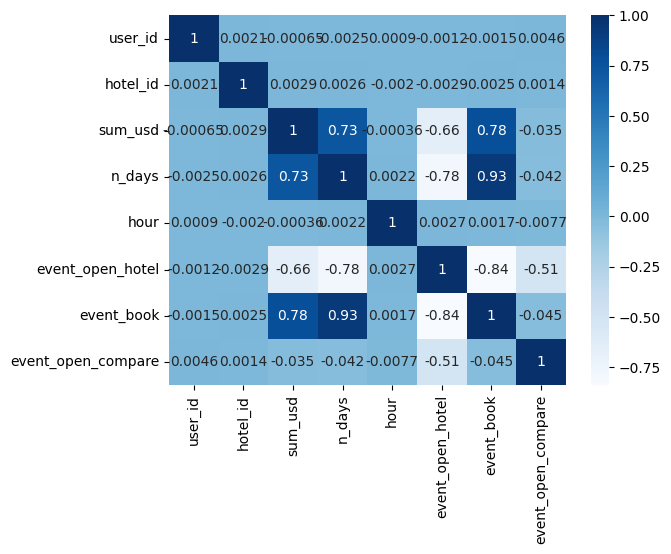

In [34]:
sb.heatmap(ds.corr(), cmap="Blues", annot=True)

Никаких особенных корреляций нет, кроме влияния числа дней на цену заказа и действия заказать с числом дней и суммой заказа - что логично.
Выделим уникальные id пользователей, которые пользовались функцией сравнения и уникальные id пользователей, которые сделали заказ на сайте. сравним значения. 

In [35]:
users_compare = ds[ds['event_open_compare']>0]['user_id'].unique()

In [36]:
users_compare

array([293626, 932866, 377323, ..., 293605, 421292, 196486])

In [37]:
len(users_compare)

3592

In [38]:
users_book = ds[ds['event_book']>0]['user_id'].unique()

In [39]:
len(users_book)

9392

In [40]:
len(list(set(users_compare) & set(users_book)))

2856

Получается, что почти треть пользователей, совершивших заказ на сайте, пользовалась услугой сравнения.

In [41]:
users_bc = list(set(users_compare) & set(users_book))

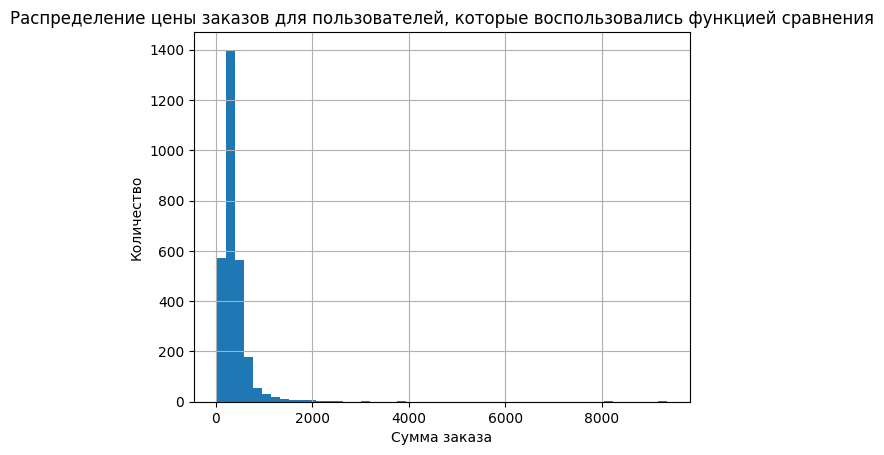

In [42]:
data.loc[(data['user_id'].isin(users_bc))&(data['sum_usd']>0)]['sum_usd'].hist(bins=50)
plt.xlabel("Cумма заказа")
plt.ylabel("Количество")
plt.title('Распределение цены заказов для пользователей, которые воспользовались функцией сравнения')
plt.show()

(0.0, 1000.0)

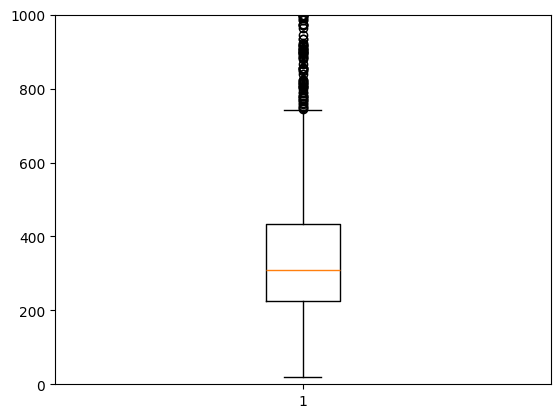

In [43]:
plt.boxplot(x=data.loc[(data['user_id'].isin(users_bc))&(data['sum_usd']>0)]['sum_usd'])
plt.ylim([0,1000])

Судя по значениям цены - нет разницы в средних значениях, пользовался ли пользователь услугой сравнения или нет.

Посмотрим, какие отели чаще всего попадали в сравнение.

In [44]:
ds[ds['event_open_compare']>0]['hotel_id'].value_counts()

hotel_id
39836137    6
89156381    5
20768506    5
84336775    5
44565455    5
           ..
80361969    1
85955014    1
11084869    1
75052929    1
75386129    1
Name: count, Length: 2359, dtype: int64

Нет существенного влияния функции сравнения с какими-то определенными отелями.

Рассмотрим ТОП-10 самых заказываемых отелей и посмотрим, как на их заказы повлияло количество сравнений.

In [45]:
top_hotels_book = data[data['sum_usd']>0]['hotel_id'].value_counts()
top_hotels_book = top_hotels_book[:10]
top_hotels_book = top_hotels_book.index
top_hotels_book 

Index([40278835, 99633920, 35105529, 16377861, 24250310, 20996139, 33148746,
       51872044, 36162861, 62880142],
      dtype='int64', name='hotel_id')

In [46]:
data_hotels_book = ds.loc[(ds['hotel_id'].isin(top_hotels_book))&(ds['event_book']>0)].sort_values(by=['hotel_id'])

data_hotels_book = data_hotels_book.groupby(['hotel_id'])['event_book'].agg(['count'])


In [47]:
data_hotels_book = data_hotels_book.sort_values(by=['count'], ascending=False)
data_hotels_book

,count
hotel_id,
40278835,17
99633920,16
24250310,14
16377861,14
35105529,14
20996139,13
33148746,12
36162861,9
51872044,9


In [48]:
data_hotels_compare = ds.loc[(ds['hotel_id'].isin(top_hotels_book))&(ds['event_open_compare']>0)].sort_values(by=['hotel_id'])
data_hotels_compare

,user_id,hotel_id,sum_usd,n_days,hour,event_open_hotel,event_book,event_open_compare


Пересечений нет. Получается, что фича помогает менее популярным отелям найти клиентов.

### Вывод

- Дана таблица данных  на 147 813 строк
  
- Столбцы:
  - time - время заказа только часы, минуты и секунды
  - user_id - id пользователя
  - event - событие (open_hotel - просмотр отеля, book - бронирование отеля, open_compare - сравнивание отелей)
  - hotel_id -  id  отеля
  - sum_usd - сумму заказа
  - n_days - количество дней бронирования
    
- Удалили дубликаты в количестве 11156 строк
  
- Были пропуски значений в столбцах sum_usd и n_days - там, где бронирования отеля не было. Заполнили пропуски значений нулями.
  
-  Соотношение количества действий пользователей:

   open_hotel      123673  
   book              9392  
   open_compare      3592  

Получилось, что большая часть действий просмотр вариантов отелей.

- По часам нет данных за 11 часов дня.
- Распределение действий пользователей по часам (просмотры/сравнение отелей/бронирования) имеет одинаковую кривую. Пик действий приходится на утренние часы с 6 до 10 утра.

- Среднее число заказа дней - 4,5
  
- Средняя сумма заказа в usd 358
  
- Корреляции между данными особенных нет - есть корреляция суммы заказа с числом дней
  
- Нашли пересечение уникальных id пользователей, которые сделали заказ и пользовались услугой сравнения. Их оказалось 2856, что составляет 30% от всех заказов. Это значит, что пользователи пользуются новой фичей и ее можно развивать.
  
- Сравнение среднего чека заказа всех заказов и заказов, которые были сделаны с помощью сравнения отелей, не выявили значимой разницы. Фича не увеличивает чек, но возможно увеличивает число заказов в целом за счет предоставления большего выбора пользователям.

- Всего рассмотрено за период 68 789 отелей, из них ТОП-5 по просмотрам имеют id:
1. 35105529    
2. 40278835    
3. 99633920    
4. 96263679    
5. 15191138

- Всего за период были забронированы номера в 8146 отелях. ТОП-5 самых популярных по бронированиям имеют id:
1. 40278835
2. 99633920    
3. 35105529    
4. 16377861    
5. 24250310

- Согласно анализу новая функция помогает не самым популярным отелям получать бронирования, при этом на популярные отели функция не влияет.
  
- Функция не выделяет какие-то особенные отели для рекомендаций



### Итог

Новая функция помогает менее популярным отелям получать новые заказы. Функцией пользуется 30% пользователей, оформляющих заказ. Можно сделать вывод, что функция популярна и приносит пользу для нишевых отелей. Для опеределения точного прогноза по функции необходимо определиться с метрикой "полезности" для сервиса.